In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import model_selection, svm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
all_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/roman_urdu_all_data.csv')
all_df = all_df.astype(str)
print(all_df.shape)
y = all_df['Label']
y = y.astype(float)
y = y.astype(int)
print(y.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(9526, 8)
(9526,)


In [ ]:
bow_converter = CountVectorizer()
bow_x = bow_converter.fit_transform(all_df['text'])
print(bow_x.shape)

(9526, 28606)


In [ ]:
tfidf_transform = TfidfTransformer(norm=None)
tfidf_x = tfidf_transform.fit_transform(bow_x)
print(tfidf_x.shape)
          

(9526, 28606)


In [ ]:
pip install ReliefF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.9 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=1f0b7dad4427de97ebad59c23eacb538661468605e4ec29c97c503ac73df3ccd
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
pip install Py_FS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Py_FS
np_tfidf_x = tfidf_x.toarray()
np_y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(tfidf_x, y, test_size=0.33, random_state=42)


GA BASED WRAPPER

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1

Crossover-Mutation phase starting....

Crossover no. 1
child 1 replaced with chromosome having id 7
child 2 replaced with chromosome having id 25

Crossover no. 2
child 1 replaced with chromosome having id 18
child 2 replaced with chromosome having id 21

Crossover no. 3
child 1 replaced with chromosome having id 1
child 2 replaced with chromosome having id 8

Crossover no. 4
child 1 replaced with chromosome having id 14
child 2 replaced with chromosome having id 23

Crossover no. 5
child 1 replaced with chromosome having id 14
child 2 replaced with chromosome having id 25

Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8309832013022899
Number of Features: 12689
----------------------------------------

Chromosome 1 - Fitness: 0.8309832013022899, Number of Features: 12689
Chromosome 2 - Fitness: 0.82138288

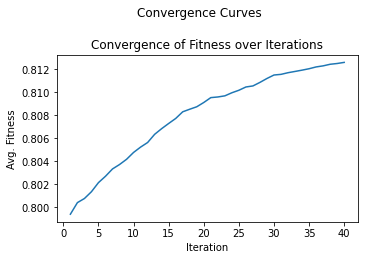

In [ ]:
solution_GA = Py_FS.wrapper.nature_inspired.GA(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


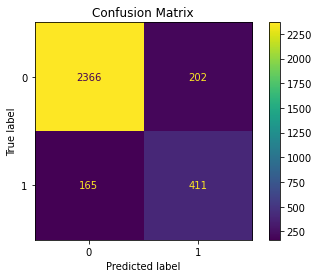

In [ ]:
res_GA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GA.best_agent ,classifier='svm', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GA.f1_score}')
print(f'recall: {res_GA.recall}')
print(f'precision: {res_GA.precision}')
print(f'accuracy: {res_GA.accuracy}')

F1_score: {0: 0.928025102961365, 1: 0.6913372582001681}
recall: {0: 0.9213395638629284, 1: 0.7135416666666666}
precision: {0: 0.9348083761359146, 1: 0.6704730831973899}
accuracy: 0.8832697201017812


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


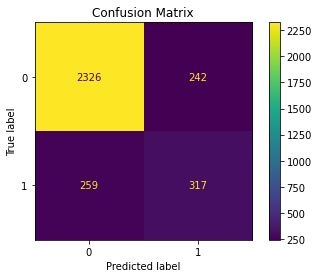

In [ ]:
res_GA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GA.best_agent ,classifier='knn', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GA.f1_score}')
print(f'recall: {res_GA.recall}')
print(f'precision: {res_GA.precision}')
print(f'accuracy: {res_GA.accuracy}')

F1_score: {0: 0.9027750824762275, 1: 0.558590308370044}
recall: {0: 0.9057632398753894, 1: 0.5503472222222222}
precision: {0: 0.8998065764023211, 1: 0.5670840787119857}
accuracy: 0.8406488549618321


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


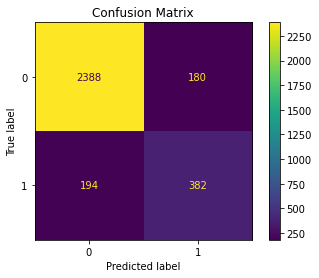

In [ ]:
res_GA = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_GA.best_agent ,classifier='rf', save_conf_mat=False)

In [ ]:
print(f'F1_score: {res_GA.f1_score}')
print(f'recall: {res_GA.recall}')
print(f'precision: {res_GA.precision}')
print(f'accuracy: {res_GA.accuracy}')

F1_score: {0: 0.9273786407766991, 1: 0.6713532513181019}
recall: {0: 0.9299065420560748, 1: 0.6631944444444444}
precision: {0: 0.924864446165763, 1: 0.6797153024911032}
accuracy: 0.8810432569974554


HARMONY SEARCH BASED WRAPPER

Weight for the classification accuracy [0-1]: 0.9
Enter the percentage of data wanted for valdiation [0, 100]: 20

                          Iteration - 1


Number of agents: 25

------------- Best Agent ---------------
Fitness: 0.8420411145116717
Number of Features: 9931
----------------------------------------

Harmony 1 - Fitness: 0.8420411145116717, Number of Features: 9931
Harmony 2 - Fitness: 0.8306957558269499, Number of Features: 12366
Harmony 3 - Fitness: 0.8200924798098184, Number of Features: 9726
Harmony 4 - Fitness: 0.8181938878091822, Number of Features: 13646
Harmony 5 - Fitness: 0.8151391753019769, Number of Features: 13034
Harmony 6 - Fitness: 0.8131920313461634, Number of Features: 13591
Harmony 7 - Fitness: 0.8131081952222909, Number of Features: 11859
Harmony 8 - Fitness: 0.8108509218011998, Number of Features: 14801
Harmony 9 - Fitness: 0.8099032269589683, Number of Features: 9534
Harmony 10 - Fitness: 0.8057480768312315, Number of Features: 11398
Harmony 11 - Fitn

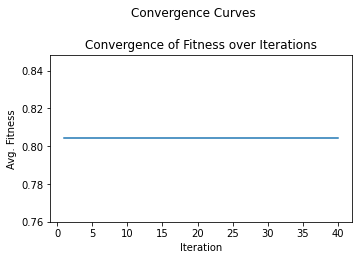

In [ ]:
solution_HS = Py_FS.wrapper.nature_inspired.HS(num_agents = 25, max_iter = 40, train_data = np_tfidf_x, train_label = np_y, save_conv_graph=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


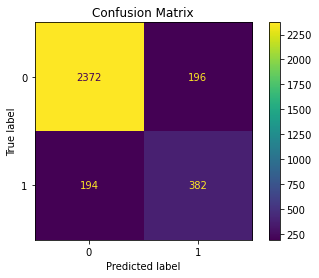

F1_score: {0: 0.9240358395013635, 1: 0.6620450606585789}
recall: {0: 0.9236760124610592, 1: 0.6631944444444444}
precision: {0: 0.9243959469992206, 1: 0.6608996539792388}
accuracy: 0.8759541984732825


In [ ]:
res_HS = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_HS.best_agent ,classifier='svm', save_conf_mat=False)
print(f'F1_score: {res_HS.f1_score}')
print(f'recall: {res_HS.recall}')
print(f'precision: {res_HS.precision}')
print(f'accuracy: {res_HS.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


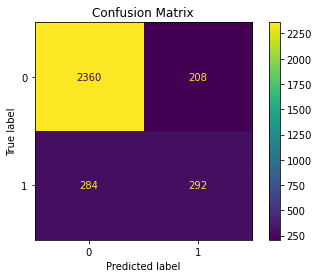

F1_score: {0: 0.9056024558710667, 1: 0.5427509293680297}
recall: {0: 0.9190031152647975, 1: 0.5069444444444444}
precision: {0: 0.8925869894099848, 1: 0.584}
accuracy: 0.8435114503816794


In [ ]:
res_HS = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_HS.best_agent ,classifier='knn', save_conf_mat=False)
print(f'F1_score: {res_HS.f1_score}')
print(f'recall: {res_HS.recall}')
print(f'precision: {res_HS.precision}')
print(f'accuracy: {res_HS.accuracy}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


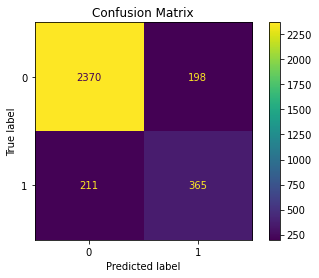

F1_score: {0: 0.9205671004078462, 1: 0.6409130816505706}
recall: {0: 0.9228971962616822, 1: 0.6336805555555556}
precision: {0: 0.9182487407981402, 1: 0.6483126110124334}
accuracy: 0.8699109414758269


In [ ]:
res_HS = Py_FS.evaluation.evaluate(X_train, X_test, y_train, y_test, agent=solution_HS.best_agent ,classifier='rf', save_conf_mat=False)
print(f'F1_score: {res_HS.f1_score}')
print(f'recall: {res_HS.recall}')
print(f'precision: {res_HS.precision}')
print(f'accuracy: {res_HS.accuracy}')